# A company has customer data that contains 8 columns of customer details and another table having name customer_policy data contains the policy details of the customer.

# The company intends to offer some discount in premium for certain customers. To do that they ask their Data scientist team to get some information. Hence, following tasks DS team decided to perform:

In [356]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [357]:
customerDetail = pd.read_csv('customer_details.csv')
customerPolDetail = pd.read_csv('customer_policy_details.csv')

# 1. Add the column names to both datasets:

##  i. Column Name for customer details table:

### customer_id, Gender, age,  driving licence present, region code, previously insured,  vehicle age, and vehicle damage.

In [358]:
customerDetail.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='object')

In [359]:
customerDetail.rename({'0':'Customer_Id','1':'Gender','2':'Age','3':'Driving Licence Present','4':'Region Code','5':'Previously Insured','6':'Vehicle Age','7':'Vehicle Damage'},axis=1,inplace=True)

In [360]:
customerDetail.head()

,Customer_Id,Gender,Age,Driving Licence Present,Region Code,Previously Insured,Vehicle Age,Vehicle Damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [361]:
customerDetail.columns

Index(['Customer_Id', 'Gender', 'Age', 'Driving Licence Present',
       'Region Code', 'Previously Insured', 'Vehicle Age', 'Vehicle Damage'],
      dtype='object')

## ii. Column Name for customer_policy table:
### customer_id,  annual premium (in Rs),  sales channel code,  vintage, and  response. 

In [362]:
customerPolDetail.columns

Index(['0', '1', '2', '3', '4'], dtype='object')

In [363]:
customerPolDetail.rename({'0':'Customer_Id','1':'Annual Premium(Rs)','2':'Sales Channel Code','3':'Vintage','4':'Response'},axis=1,inplace=True)

In [364]:
customerPolDetail.head()

,Customer_Id,Annual Premium(Rs),Sales Channel Code,Vintage,Response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


In [365]:
customerPolDetail.columns

Index(['Customer_Id', 'Annual Premium(Rs)', 'Sales Channel Code', 'Vintage',
       'Response'],
      dtype='object')

# 2. Checking and Cleaning Data Quality:

## i. Null values

### Generate a summary of count of all the null values column wise


In [366]:
customerDetail.isnull().sum()

Customer_Id                386
Gender                     368
Age                        368
Driving Licence Present    393
Region Code                392
Previously Insured         381
Vehicle Age                381
Vehicle Damage             407
dtype: int64

In [367]:
customerPolDetail.isnull().sum()

Customer_Id           387
Annual Premium(Rs)    346
Sales Channel Code    400
Vintage               388
Response              361
dtype: int64

In [368]:
customerDetail['Customer_Id'].isna().sum()

386

In [369]:
customerDetail['Customer_Id'].count()

380723

In [370]:
customerPolDetail['Customer_Id'].isna().sum()

387

In [371]:
customerPolDetail['Customer_Id'].count()

380722

## Replace all null values for numeric columns by mean.

## Drop Null values for customer_id

In [372]:
customerDetail=customerDetail.dropna(subset=['Customer_Id'])

In [373]:
customerDetail.isna().sum()

Customer_Id                  0
Gender                     368
Age                        366
Driving Licence Present    392
Region Code                391
Previously Insured         381
Vehicle Age                381
Vehicle Damage             406
dtype: int64

In [374]:
customerPolDetail=customerPolDetail.dropna(subset=['Customer_Id'])

In [375]:
customerPolDetail.isna().sum()

Customer_Id             0
Annual Premium(Rs)    344
Sales Channel Code    400
Vintage               388
Response              361
dtype: int64

In [376]:
customerPolDetail.fillna(customerPolDetail.mean().mean(),inplace=True)

In [377]:
customerPolDetail.isna().sum()

Customer_Id           0
Annual Premium(Rs)    0
Sales Channel Code    0
Vintage               0
Response              0
dtype: int64

In [378]:
customerPolDetail.fillna(customerPolDetail.mean().mean(),inplace=True)

In [379]:
customerDetail.isna().sum()

Customer_Id                  0
Gender                     368
Age                        366
Driving Licence Present    392
Region Code                391
Previously Insured         381
Vehicle Age                381
Vehicle Damage             406
dtype: int64

In [380]:
customerDetail['Gender']=customerDetail['Gender'].fillna(customerDetail['Gender'].mode()[0])
customerDetail['Age']=customerDetail['Age'].fillna(customerDetail['Age'].mode()[0])
customerDetail['Driving Licence Present']=customerDetail['Driving Licence Present'].fillna(customerDetail['Driving Licence Present'].mode()[0])
customerDetail['Region Code']=customerDetail['Region Code'].fillna(customerDetail['Region Code'].mode()[0])
customerDetail['Previously Insured']=customerDetail['Previously Insured'].fillna(customerDetail['Previously Insured'].mode()[0])
customerDetail['Vehicle Age']=customerDetail['Vehicle Age'].fillna(customerDetail['Vehicle Age'].mode()[0])
customerDetail['Vehicle Damage']=customerDetail['Vehicle Damage'].fillna(customerDetail['Vehicle Damage'].mode()[0])

In [381]:
customerDetail.isnull().sum()

Customer_Id                0
Gender                     0
Age                        0
Driving Licence Present    0
Region Code                0
Previously Insured         0
Vehicle Age                0
Vehicle Damage             0
dtype: int64

In [382]:
customerDetail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380723 entries, 0 to 381108
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_Id              380723 non-null  float64
 1   Gender                   380723 non-null  object 
 2   Age                      380723 non-null  float64
 3   Driving Licence Present  380723 non-null  float64
 4   Region Code              380723 non-null  float64
 5   Previously Insured       380723 non-null  float64
 6   Vehicle Age              380723 non-null  object 
 7   Vehicle Damage           380723 non-null  object 
dtypes: float64(5), object(3)
memory usage: 26.1+ MB


## ii. Outliers

## • Generate a summary of count of all the outliers column wise

### (Hint1: for outlier treatment use IQR method as follows:

### For example: for a column X calculate Q1 = 25th percentile and Q3 = 75th percentile then IQR = Q3 – Q1 ) then to check outlier, anything lower than a Q1 – 1.5IQR or greater than Q3 + 1.5 IQR would be an outlier

### Hint2: For getting percentile value, explore pd.describe() function)

In [383]:
customerDetail.describe()

,Customer_Id,Age,Driving Licence Present,Region Code,Previously Insured
count,380723.000000,380723.000000,380723.000000,380723.000000,380723.000000
mean,190548.776244,38.808538,0.997870,26.391090,0.457800
std,110016.805160,15.511629,0.046105,13.223772,0.498217
min,1.000000,20.000000,0.000000,0.000000,0.000000
25%,95269.500000,25.000000,1.000000,15.000000,0.000000
50%,190543.000000,36.000000,1.000000,28.000000,0.000000
75%,285822.500000,49.000000,1.000000,35.000000,1.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000


In [384]:
customerPolDetail.describe()

,Customer_Id,Annual Premium(Rs),Sales Channel Code,Vintage,Response
count,380722.000000,380722.000000,380722.000000,380722.000000,380722.000000
mean,190547.491663,30576.388841,158.436489,199.311880,42.104463
std,110013.824148,17195.083416,1431.770977,1410.274933,1362.722574
min,1.000000,2630.000000,1.000000,10.000000,0.000000
25%,95276.250000,24416.000000,29.000000,82.000000,0.000000
50%,190536.500000,31680.000000,136.000000,154.000000,0.000000
75%,285818.750000,39430.000000,152.000000,227.000000,0.000000
max,381109.000000,540165.000000,44275.599568,44275.599568,44275.599568


In [385]:
q1=customerPolDetail.quantile(0.25)
q3=customerPolDetail.quantile(0.75)
iqr=q3-q1
l=q1-(1.5*iqr)
u=q3+(1.5*iqr)
((customerPolDetail<l)|(customerPolDetail>u)).sum()

Customer_Id               0
Annual Premium(Rs)    10239
Sales Channel Code      400
Vintage                 388
Response              46965
dtype: int64

## • Replace all outlier values for numeric columns by mean. 

In [386]:
customerPolDetail['Annual Premium(Rs)']=customerPolDetail['Annual Premium(Rs)'].astype('float')

In [387]:
q1=customerPolDetail[['Annual Premium(Rs)']].quantile(0.25)
q3=customerPolDetail[['Annual Premium(Rs)']].quantile(0.75)

In [388]:
iqr=q3-q1
l=q1-(1.5*iqr)
u=q3+(1.5*iqr)

In [389]:
((customerPolDetail[['Annual Premium(Rs)']]<l)|(customerPolDetail[['Annual Premium(Rs)']]>u)).sum()

Annual Premium(Rs)    10239
dtype: int64

## iii. White spaces

### Remove white spaces

In [390]:
customerDetail['Gender'].str.strip()

0           Male
1           Male
2           Male
3           Male
4         Female
           ...  
381104      Male
381105      Male
381106      Male
381107    Female
381108      Male
Name: Gender, Length: 380723, dtype: object

## iv. case correction(lower or upper, any one) 

In [391]:
customerDetail.apply(lambda x: x.astype(str).str.upper())
customerDetail.head()

,Customer_Id,Gender,Age,Driving Licence Present,Region Code,Previously Insured,Vehicle Age,Vehicle Damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


## v. Convert nominal data (categorical) into dummies 

### for future modeling use if required   ===> (Remove # for usinf the below program)

In [392]:
#customerDetail=pd.get_dummies(customerDetail)

In [393]:
#customerDetail.head()

In [394]:
#customerPolDetail=pd.get_dummies(customerPolDetail)

In [395]:
#customerPolDetail.head()

## vi. Drop Duplicates (duplicated rows)

In [396]:
customerDetail.drop_duplicates().head()

,Customer_Id,Gender,Age,Driving Licence Present,Region Code,Previously Insured,Vehicle Age,Vehicle Damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


# 3. Create a Master table for future use. Join the customer table and customer_policy table to get a master table using customer_id in both tables.

## (Hint: use pd.merge() function)

In [397]:
customerDetail

,Customer_Id,Gender,Age,Driving Licence Present,Region Code,Previously Insured,Vehicle Age,Vehicle Damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [398]:
customerPolDetail

,Customer_Id,Annual Premium(Rs),Sales Channel Code,Vintage,Response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


In [399]:
master_table = pd.merge(customerDetail,customerPolDetail)

In [400]:
master_table['Age']=master_table['Age'].astype('int')
master_table.head()

,Customer_Id,Gender,Age,Driving Licence Present,Region Code,Previously Insured,Vehicle Age,Vehicle Damage,Annual Premium(Rs),Sales Channel Code,Vintage,Response
0,1.0,Male,44,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2.0,Male,76,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3.0,Male,47,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4.0,Male,21,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5.0,Female,29,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0


# 4. Company needs some important information from the master table to make decisions for future growth.They needs following information:

## i. Gender wise average annual premium

In [401]:
master_table.groupby(['Gender'])['Annual Premium(Rs)'].mean()

Gender
Female    30505.151882
Male      30635.409127
Name: Annual Premium(Rs), dtype: float64

<AxesSubplot:ylabel='Annual Premium(Rs)'>

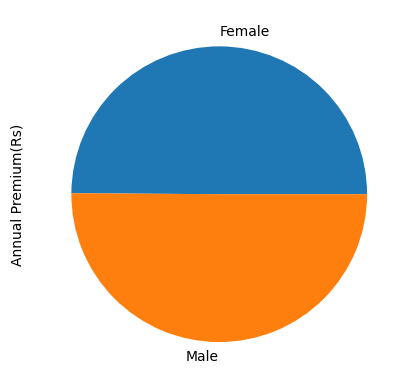

In [402]:
GEN1 =master_table.groupby(['Gender'])['Annual Premium(Rs)'].mean()
GEN1.plot.pie()

## ii. Age wise average annual premium

In [403]:
master_table.groupby(['Age'])['Annual Premium(Rs)'].mean()

Age
20    26940.061164
21    30573.665891
22    30837.557285
23    30698.806695
24    31200.619093
          ...     
81    31201.571429
82    37705.379310
83    31012.727273
84    35440.818182
85    29792.363636
Name: Annual Premium(Rs), Length: 66, dtype: float64

<AxesSubplot:xlabel='Age'>

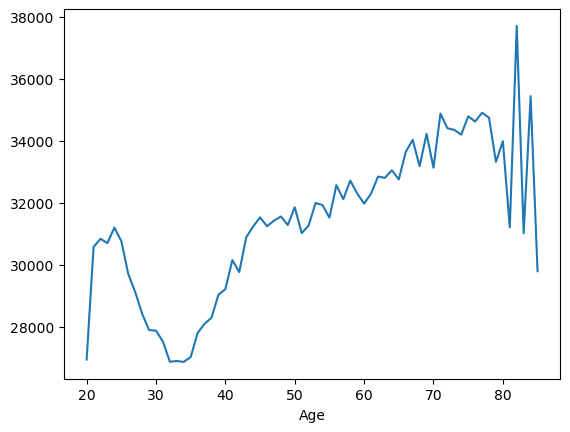

In [404]:
AGE =master_table.groupby(['Age'])['Annual Premium(Rs)'].mean()
AGE.plot()

## iii. Is your data balanced between the genders?

### (Hint: Data is balanced if number of counts in each group is approximately same)

<AxesSubplot:>

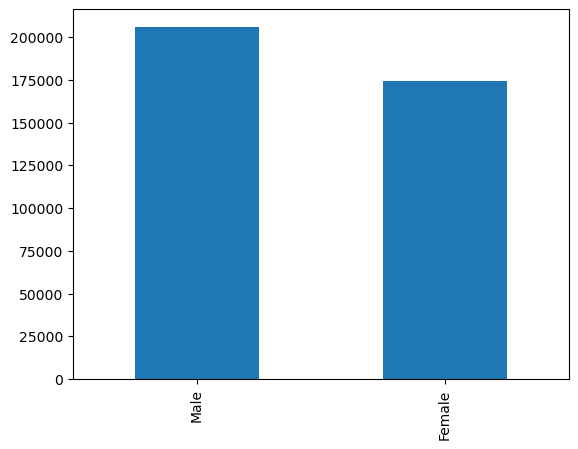

In [405]:
Gen = master_table['Gender'].value_counts()
Gen.plot.bar()

## iv. Vehicle age wise average annual premium.

<AxesSubplot:xlabel='Vehicle Age'>

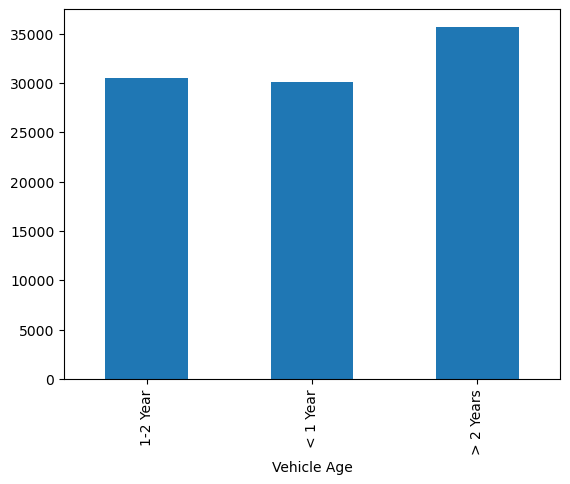

In [406]:
AP_VA = master_table.groupby(['Vehicle Age'])['Annual Premium(Rs)'].mean()
AP_VA.plot.bar()

# 5. Is there any relation between Person Age and annual premium?

## Hint: use correlation function (Correlation describes the relationship between two variables). 

### Correlation coefficient < -0.5           - Strong negative relationship

### Correlation coefficient > 0.5            -  Strong positive relationship

### 0.5 < Correlation coefficient < 0.5   - There is no relationship. 

In [407]:
master_table.corr()

,Customer_Id,Age,Driving Licence Present,Region Code,Previously Insured,Annual Premium(Rs),Sales Channel Code,Vintage,Response
Customer_Id,1.000000,0.001764,-0.000476,-0.000727,0.002464,0.003068,-0.001465,0.000826,0.000939
Age,0.001764,1.000000,-0.079523,0.042538,-0.254211,0.067695,-0.023459,-0.000098,-0.001318
Driving Licence Present,-0.000476,-0.079523,1.000000,-0.001063,0.014905,-0.012062,0.003157,-0.000358,-0.002282
Region Code,-0.000727,0.042538,-0.001063,1.000000,-0.024625,-0.010629,-0.004257,0.001716,0.001691
Previously Insured,0.002464,-0.254211,0.014905,-0.024625,1.000000,0.004454,0.007695,-0.001117,0.000293
Annual Premium(Rs),0.003068,0.067695,-0.012062,-0.010629,0.004454,1.000000,-0.004937,0.001383,-0.002410
Sales Channel Code,-0.001465,-0.023459,0.003157,-0.004257,0.007695,-0.004937,1.000000,0.001736,-0.000984
Vintage,0.000826,-0.000098,-0.000358,0.001716,-0.001117,0.001383,0.001736,1.000000,-0.001021
Response,0.000939,-0.001318,-0.002282,0.001691,0.000293,-0.002410,-0.000984,-0.001021,1.000000


In [408]:
np.corrcoef(master_table['Age'],master_table['Annual Premium(Rs)'])  

array([[1.        , 0.06769523],
       [0.06769523, 1.        ]])

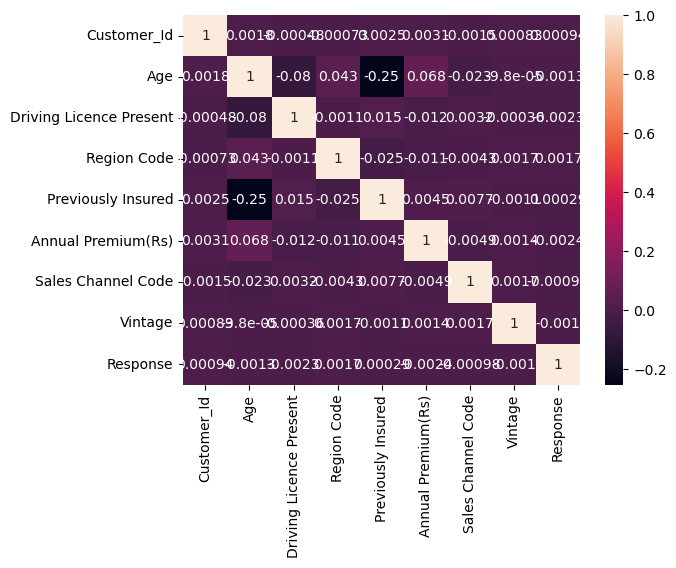

In [409]:
corrMatrix = master_table.corr()
sns.heatmap(corrMatrix, annot = True)
plt.show()